# Edelweiss Machine Learning Hackathon


In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [296]:
RF_Final_Data = pd.read_csv('RF_Final_Data.csv')

In [297]:
RF_Final_Data.head()

,TicketId,Type,SubType,Status,Date,Preprocessed_EmailBody,Preprocessed_Subject,Masked_CustomerID,Masked_AgreementID
0,571910,REQUEST,PROVISIONAL IT CERTIFICATE,Close,2019-01-23 16:34:00,"hi team, can you please provide me itcertifica...",loan account number - loannumber,12020736,0
1,572747,REQUEST,SOA,Close,2019-01-24 16:05:00,hi team can you please arrange the certificate...,certificate of interest and principal for home...,12019080,0
2,4622,General,Others,Close,2016-02-12 13:40:00,NaN,re: repaysch : loan number loannumber,12004815,0
3,4674,REQUEST,SOA,Close,2016-02-12 15:41:00,"dear sir, you for your promptreply, please not...",re: finalit : loan number loannumber,12005158,11230237
4,4681,QUERY,CHANGEOFROI,Close,2016-02-12 15:55:00,"dear sachin, for your mail. this seems a great...",re: fw: repaysch : loan number loannumber,12001022,0


In [298]:
RF_Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7511 entries, 0 to 7510
Data columns (total 9 columns):
TicketId                  7511 non-null int64
Type                      7511 non-null object
SubType                   7511 non-null object
Status                    7511 non-null object
Date                      7511 non-null object
Preprocessed_EmailBody    7356 non-null object
Preprocessed_Subject      7328 non-null object
Masked_CustomerID         7511 non-null int64
Masked_AgreementID        7511 non-null int64
dtypes: int64(3), object(6)
memory usage: 528.2+ KB


In [299]:
RF_Final_Data['TicketId'].value_counts(ascending = False)[0:10]

485371    1
9598      1
85355     1
48493     1
451950    1
55065     1
267632    1
23921     1
17778     1
462195    1
Name: TicketId, dtype: int64

In [300]:
RF_Final_Data['Type'].value_counts(ascending = False)[0:100]

REQUEST        5865
QUERY          1502
COMPLAINT        94
General          29
Foreclosure       9
ROI               6
Unassigned        4
Request           2
Name: Type, dtype: int64

In [301]:
RF_Final_Data['SubType'].value_counts(ascending = False)[0:100]

FORECLOSURE                                       2027
CHANGEOFROI                                        968
SOA                                                836
Others                                             609
REPAYMENT SCHEDULE                                 374
TDSREIMBRELATED                                    368
LISTOFDOCS                                         361
COPYOFORIGDOCS                                     255
FINAL IT CERTIFICATE NONHL                         191
FINAL IT CERTIFICATE                               178
PREPAYEMICHNG                                      174
UPDATECONTACTDET                                   134
PROVISIONAL IT CERTIFICATE                         117
CHANGEREPAYMODE                                    109
EXCESS EMI REFUND                                  100
EMI NOT BANKED                                      90
DISBURSEMENT BREAK UP REQUIRED                      74
COMPLAINT                                           64
PREPAYTENO

In [302]:
RF_Final_Data['Status'].value_counts(ascending = False)[0:100]

Close       7245
Re-Open      156
Open          88
Rejected      22
Name: Status, dtype: int64

In [303]:
RF_Final_Data['Date'].value_counts(ascending = False)[0:100]

2018-10-08 00:00:00    16
2017-04-05 10:11:00    14
2018-07-04 00:00:00    14
2018-04-24 13:16:00    14
2017-03-13 00:00:00    12
2018-08-29 14:18:00    11
2018-07-16 00:00:00    11
2016-05-23 11:25:00    11
2018-08-29 14:21:00    11
2018-04-24 13:13:00    10
2017-01-04 00:00:00    10
2017-05-02 10:00:00     9
2018-10-05 00:00:00     9
2018-08-13 00:00:00     9
2018-07-09 00:00:00     9
2018-07-30 00:00:00     9
2018-08-07 00:00:00     9
2017-11-27 11:00:00     9
2018-01-18 00:00:00     8
2018-04-24 13:14:00     8
2016-07-25 10:35:00     8
2017-08-23 00:00:00     8
2018-07-24 00:00:00     8
2018-08-22 00:00:00     8
2016-09-28 00:00:00     8
2018-01-19 00:00:00     8
2018-04-24 12:16:00     7
2019-01-04 00:00:00     7
2018-01-23 00:00:00     7
2017-04-07 00:00:00     7
                       ..
2018-04-09 00:00:00     6
2018-05-18 00:00:00     6
2017-03-02 00:00:00     6
2018-05-04 00:00:00     6
2017-04-05 10:10:00     5
2018-04-24 12:15:00     5
2018-01-12 00:00:00     5
2016-06-22 0

In [304]:
RF_Final_Data['Masked_CustomerID'].value_counts(ascending = False)[0:160]

12009302    40
12003206    28
12007090    26
12001834    25
12002279    24
12001066    24
12008855    22
12009269    22
12016391    22
12004696    21
12006804    20
12003944    19
12002355    19
12010202    18
12007913    18
12009624    17
12004431    17
12006872    17
12007293    17
12002286    17
12006461    16
12002354    16
12003354    16
12005470    16
12001680    15
12003068    15
12008600    15
12003838    14
12007798    14
12005794    14
            ..
12009189     8
12012500     8
12011753     8
12001717     8
12005276     8
12005058     8
12006704     8
12002770     8
12005230     8
12005757     8
12003082     8
12005086     8
12002983     8
12028094     8
12007838     8
12009815     7
12007016     7
12001313     7
12007364     7
12003060     7
12005262     7
12006774     7
12001885     7
12008468     7
12010060     7
12004150     7
12008915     7
12005080     7
12009511     7
12002640     7
Name: Masked_CustomerID, Length: 160, dtype: int64

In [305]:
RF_Final_Data.loc[RF_Final_Data['Masked_CustomerID'] ==12009302]

,TicketId,Type,SubType,Status,Date,Preprocessed_EmailBody,Preprocessed_Subject,Masked_CustomerID,Masked_AgreementID
817,14241,QUERY,TDSREIMBRELATED,Close,2016-07-08 14:00:00,please confirm when the refunds are going to b...,tds refund overdue,12009302,0
952,16607,QUERY,TDSREIMBRELATED,Close,2016-08-03 00:00:00,please find attached the tds paid challan for ...,tds refund,12009302,0
1096,19381,QUERY,TDSREIMBRELATED,Close,2016-09-02 11:55:00,please find attached the tds paid challan for ...,tds paid challan,12009302,0
1100,19501,QUERY,TDSREIMBRELATED,Close,2016-09-04 13:10:00,"with reference to email below, please note tha...",re: tds paid challan,12009302,0
1132,20211,QUERY,CHANGEREPAYMODE,Close,2016-09-12 00:00:00,everything requested below has already been se...,re: re:[ticketid:rf99999]change of bank accoun...,12009302,0
1158,20816,QUERY,CHANGEREPAYMODE,Close,2016-09-19 00:00:00,still awaiting revert. been one week; kindly r...,re: request for reversals and loan statements,12009302,0
1369,26514,QUERY,TDSREIMBRELATED,Close,2016-11-03 00:00:00,please refund the tds deposited as per attache...,tds paid challan of ecl finance,12009302,0
1393,31299,QUERY,TDSREIMBRELATED,Close,2016-11-09 00:00:00,kindly process the tds refund as its still not...,fw: tds paid challan of ecl finance,12009302,0
1680,46112,QUERY,CHANGEOFROI,Close,2017-01-04 00:00:00,this is with reference to our two loans agains...,interest rate reduction,12009302,0
1710,46952,REQUEST,SOA,Close,2017-01-06 13:20:00,this is with reference to our two loans agains...,statement of account,12009302,0


In [306]:
def plot_box(df, numeric_variable):
    sns.boxplot(y=df[numeric_variable])
    #plt.yscale('log')
    #plt.ylim(5, 50)
    plt.title("Distribution of "+ numeric_variable)
    plt.show()

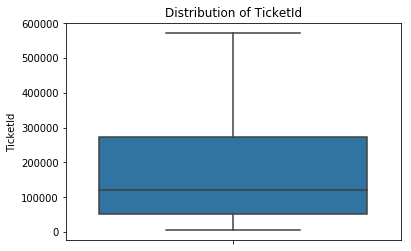

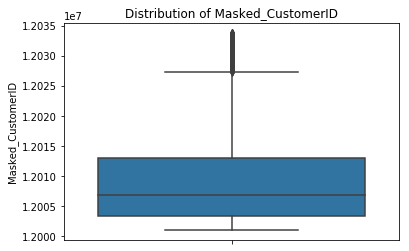

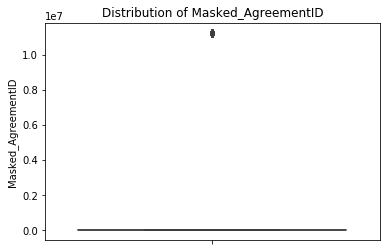

In [307]:
for numeric_variable in RF_Final_Data._get_numeric_data():
    plot_box(RF_Final_Data, numeric_variable)

In [308]:
LMS = pd.read_csv('LMS_31JAN2019.csv')

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [309]:
LMS.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,"1,17,10,107.24","1,17,10,107.24",30-Aug-10,13.7,10.6,58.0,120,1,...,40.06,39,19.0,0.0,0.6000,HL,10901100.0,NaN,NaN,39
1,11220002,12001001.0,"1,92,90,253.32","1,92,90,253.32",15-Sep-10,13.7,10.6,137.0,180,1,...,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,"40,53,498.66","40,53,498.66",06-Sep-10,17.2,12.5,360.0,180,5,...,79.34,38,322.0,0.0,0.9100,HL,10901101.0,NaN,NaN,38
3,11220004,12001003.0,"1,32,57,031.92","1,32,57,031.92",29-Sep-10,15.6,10.9,198.0,180,5,...,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN,38
4,11220005,12001004.0,"1,32,11,403.04","1,32,11,403.04",06-Sep-10,16.5,11.9,142.0,180,5,...,40.93,38,104.0,0.0,0.7300,HL,10901101.0,NaN,NaN,38


In [310]:
LMS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624250 entries, 0 to 624249
Data columns (total 38 columns):
AGREEMENTID              624250 non-null int64
CUSTOMERID               623734 non-null float64
LOAN_AMT                 624250 non-null object
NET_DISBURSED_AMT        624250 non-null object
INTEREST_START_DATE      624250 non-null object
CURRENT_ROI              624250 non-null float64
ORIGNAL_ROI              624250 non-null float64
CURRENT_TENOR            624245 non-null float64
ORIGNAL_TENOR            624250 non-null int64
DUEDAY                   624250 non-null int64
AUTHORIZATIONDATE        624250 non-null object
CITY                     624242 non-null object
PRE_EMI_DUEAMT           624250 non-null float64
PRE_EMI_RECEIVED_AMT     624250 non-null float64
PRE_EMI_OS_AMOUNT        624250 non-null float64
EMI_DUEAMT               624250 non-null float64
EMI_RECEIVED_AMT         624250 non-null float64
EMI_OS_AMOUNT            624250 non-null float64
EXCESS_AVAILABLE  

In [311]:
LMS.rename(columns={"AGREEMENTID":"Agreement_ID", "CUSTOMERID":"Customer_ID", "LOAN_AMT":"Loan_Amt",
                   "NETDISBURSED_AMT":"Net_Disbursed_Amt", "INTEREST_START_DATE":"Interest_Start_Date",
                   "CURRENT_ROI":"Current_ROI", "ORIGNAL_ROI": "Original_ROI", "CURRENT_TENOR":"Current_Tenure",
                   "ORIGNAL_TENOR":"Original_Tenure", "DUEDAY":"Due_Day"}, inplace = True)

In [312]:
LMS.rename(columns={"AUTHORIZATIONDATE":"Authorization_Date","CITY":"City", "PRE_EMI_DUEAMT":"Pre_EMI_Due_Amt",
                   "PRE_EMI_RECEIVED_AMT":"Pre_EMI_Received_Amt", "PRE_EMI_OS_AMT":"Pre_EMI_OS_Amt",
                   "EMI_DUEAMT":"EMI_Due_Amt","EMI_RECEIVED_AMT":"EMI_Received_Amt","EMI_OS_AMT":"EMI_OS_Amt"},inplace  = True)

In [313]:

LMS.rename(columns = {"EXCESS_AVAILABLE":"Excess_Available", "EXCESS_ADJUSTED_AMT":"Excess_Adjusted_Amt"
                      ,"BALANCE_EXCESS":"Balance_Excess", "NET_RECEIVABLE":"Net_Receivable",
                      "OUTSTANDING_PRINCIPAL":"Outstanding_Principal", "PAID_PRINCIPAL":"Paid_Principal",
                      "PAID_INTEREST":"Paid_Interest", "MONTHOPENING":"Month_Opening",
                      "LAST_RECEIPT_DATE":"Last_Receipt_Date", "NET_LTV":"Net_LTV","COMPLETED_TENURE":"Completed_Tenure"
                      ,"BALANCE_TENURE":"Balance_Tenure","DPD":"DPD","FOIR":"FOIR", "PRODUCT":"Product"
                      , "SCHEMEID":"Scheme_ID", "NPA_IN_LAST_MONTH":"NPA_In_Last_Month", "NPA_IN_CURRENT_MONTH":"NPA_In_Current_Month"
                      ,"MOB":"MOB"}, inplace = True)

In [314]:
LMS.loc[LMS['Customer_ID'].isnull() == True]

,Agreement_ID,Customer_ID,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Current_ROI,Original_ROI,Current_Tenure,Original_Tenure,Due_Day,...,Net_LTV,Completed_Tenure,Balance_Tenure,DPD,FOIR,Product,Scheme_ID,NPA_In_Last_Month,NPA_In_Current_Month,MOB
545787,11252411,NaN,"14,11,425.23","14,11,425.23",31-Oct-18,17.5,17.5,240.0,240,5,...,70.95,0,240.0,0.0,0.46,STHL,NaN,NaN,NaN,0
545788,11252412,NaN,"27,81,796.03","27,81,796.03",31-Oct-18,13.7,13.7,180.0,180,1,...,59.62,0,180.0,0.0,0.44,STLAP,NaN,NaN,NaN,0
570874,11252718,NaN,"12,01,036.64","12,01,036.64",30-Nov-18,13.7,13.7,144.0,144,5,...,23.50,0,144.0,0.0,0.51,LAP,NaN,NaN,NaN,0
570875,11252719,NaN,"37,27,544.82","37,27,544.82",23-Nov-18,13.4,13.4,240.0,240,5,...,87.23,0,240.0,0.0,0.50,STHL,NaN,NaN,NaN,0
570876,11252411,NaN,"14,11,425.23","14,11,425.23",31-Oct-18,17.5,17.5,240.0,240,5,...,70.95,0,240.0,0.0,0.46,STHL,NaN,NaN,NaN,1
570877,11252412,NaN,"27,81,796.03","27,81,796.03",31-Oct-18,13.7,13.7,180.0,180,1,...,59.62,1,179.0,0.0,0.44,STLAP,NaN,NaN,NaN,1
570878,11252720,NaN,"15,01,295.80","15,01,295.80",30-Nov-18,16.2,16.2,240.0,240,5,...,31.06,0,240.0,0.0,0.46,STHL,NaN,NaN,NaN,0
570879,11252721,NaN,"16,06,386.51","9,83,769.11",28-Nov-18,15.0,15.0,144.0,144,5,...,58.77,0,144.0,0.0,0.30,STHL,NaN,NaN,NaN,0
570880,11252722,NaN,"38,52,325.02","38,52,325.02",30-Nov-18,13.4,13.4,240.0,240,15,...,89.97,0,240.0,0.0,0.58,STHL,NaN,NaN,NaN,0
570881,11252723,NaN,"16,51,425.38","16,51,425.38",30-Nov-18,14.7,14.7,192.0,192,5,...,55.56,0,192.0,0.0,0.26,STHL,NaN,NaN,NaN,0


In [315]:
LMS['Customer_ID'] = LMS['Customer_ID'].fillna(0)

In [338]:
Train = pd.read_csv("test_foreclosure.csv")

In [339]:
Train.head()

,AGREEMENTID,FORECLOSURE
0,11220003,NaN
1,11220004,NaN
2,11220005,NaN
3,11220007,NaN
4,11220009,NaN


In [340]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13342 entries, 0 to 13341
Data columns (total 2 columns):
AGREEMENTID    13342 non-null int64
FORECLOSURE    0 non-null float64
dtypes: float64(1), int64(1)
memory usage: 208.5 KB


In [341]:
Train.rename(columns = {"AGREEMENTID":"Agreement_ID", "FORECLOSURE":"Foreclosure"}, inplace= True)

In [342]:
LMS['Customer_ID'] = LMS['Customer_ID'].astype(int)

In [343]:
Latest_LMS = LMS.groupby(['Customer_ID'], sort=False)['MOB'].max()

In [344]:
Latest_LMS = Latest_LMS.to_frame()

In [345]:
Latest_LMS.reset_index(level=0, inplace=True)

In [346]:
Latest_LMS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32896 entries, 0 to 32895
Data columns (total 2 columns):
Customer_ID    32896 non-null int64
MOB            32896 non-null int64
dtypes: int64(2)
memory usage: 514.1 KB


In [347]:
New_LMS  = pd.merge(Latest_LMS, LMS, on=['Customer_ID', 'MOB'], how='inner')

In [348]:
New_LMS.head()

,Customer_ID,MOB,Agreement_ID,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Current_ROI,Original_ROI,Current_Tenure,Original_Tenure,...,LAST_RECEIPT_AMOUNT,Net_LTV,Completed_Tenure,Balance_Tenure,DPD,FOIR,Product,Scheme_ID,NPA_In_Last_Month,NPA_In_Current_Month
0,12001000,45,11220001,"1,17,10,107.24","1,17,10,107.24",30-Aug-10,13.4,10.6,45.0,120,...,1000000.0,40.06,45,0.0,0.0,0.6000,HL,10901100.0,NaN,NaN
1,12001001,38,11220002,"1,92,90,253.32","1,92,90,253.32",15-Sep-10,13.7,10.6,137.0,180,...,126530.0,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN
2,12001002,87,11220003,"40,53,498.66","40,53,498.66",06-Sep-10,16.5,12.5,311.0,180,...,30898.0,79.34,87,224.0,0.0,0.9100,HL,10901101.0,NaN,NaN
3,12001003,38,11220004,"1,32,57,031.92","1,32,57,031.92",29-Sep-10,15.6,10.9,198.0,180,...,88256.0,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN
4,12001004,46,11220005,"1,32,11,403.04","1,32,11,403.04",06-Sep-10,16.5,11.9,142.0,180,...,91892.0,40.93,46,96.0,0.0,0.7300,HL,10901101.0,NaN,NaN


In [349]:
New_LMS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32896 entries, 0 to 32895
Data columns (total 38 columns):
Customer_ID              32896 non-null int64
MOB                      32896 non-null int64
Agreement_ID             32896 non-null int64
Loan_Amt                 32896 non-null object
NET_DISBURSED_AMT        32896 non-null object
Interest_Start_Date      32896 non-null object
Current_ROI              32896 non-null float64
Original_ROI             32896 non-null float64
Current_Tenure           32896 non-null float64
Original_Tenure          32896 non-null int64
Due_Day                  32896 non-null int64
Authorization_Date       32896 non-null object
City                     32896 non-null object
Pre_EMI_Due_Amt          32896 non-null float64
Pre_EMI_Received_Amt     32896 non-null float64
PRE_EMI_OS_AMOUNT        32896 non-null float64
EMI_Due_Amt              32896 non-null float64
EMI_Received_Amt         32896 non-null float64
EMI_OS_AMOUNT            32896 non-null fl

In [350]:
Train = pd.merge(Train, New_LMS, on='Agreement_ID', how='inner')

In [351]:
Train.head()

,Agreement_ID,Foreclosure,Customer_ID,MOB,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Current_ROI,Original_ROI,Current_Tenure,...,LAST_RECEIPT_AMOUNT,Net_LTV,Completed_Tenure,Balance_Tenure,DPD,FOIR,Product,Scheme_ID,NPA_In_Last_Month,NPA_In_Current_Month
0,11220003,NaN,12001002,87,"40,53,498.66","40,53,498.66",06-Sep-10,16.5,12.5,311.0,...,30898.0,79.34,87,224.0,0.0,0.9100,HL,10901101.0,NaN,NaN
1,11220004,NaN,12001003,38,"1,32,57,031.92","1,32,57,031.92",29-Sep-10,15.6,10.9,198.0,...,88256.0,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN
2,11220005,NaN,12001004,46,"1,32,11,403.04","1,32,11,403.04",06-Sep-10,16.5,11.9,142.0,...,91892.0,40.93,46,96.0,0.0,0.7300,HL,10901101.0,NaN,NaN
3,11220007,NaN,12001006,46,"61,55,312.78","61,55,312.78",11-Oct-10,16.5,12.5,262.0,...,47247.0,45.32,37,225.0,0.0,1.2300,HL,10901101.0,NaN,NaN
4,11220009,NaN,12001008,43,"94,99,284.03","94,99,284.03",10-Nov-10,18.9,13.6,52.0,...,59766.0,52.34,41,11.0,0.0,0.6100,LAP,10901109.0,NaN,NaN


In [352]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13165 entries, 0 to 13164
Data columns (total 39 columns):
Agreement_ID             13165 non-null int64
Foreclosure              0 non-null float64
Customer_ID              13165 non-null int64
MOB                      13165 non-null int64
Loan_Amt                 13165 non-null object
NET_DISBURSED_AMT        13165 non-null object
Interest_Start_Date      13165 non-null object
Current_ROI              13165 non-null float64
Original_ROI             13165 non-null float64
Current_Tenure           13165 non-null float64
Original_Tenure          13165 non-null int64
Due_Day                  13165 non-null int64
Authorization_Date       13165 non-null object
City                     13165 non-null object
Pre_EMI_Due_Amt          13165 non-null float64
Pre_EMI_Received_Amt     13165 non-null float64
PRE_EMI_OS_AMOUNT        13165 non-null float64
EMI_Due_Amt              13165 non-null float64
EMI_Received_Amt         13165 non-null float6

In [353]:
Customer = pd.read_csv("Customers_31JAN2019.csv")

In [354]:
Customer.head()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,12001000,1,5,NaN,33.0,M,M,POSTGRAD,0.0,NaN,NaN,198375.2218,8.0,198375.2218,400070.0
1,12001001,1,5,NaN,44.0,M,M,POSTGRAD,0.0,NaN,NaN,242703.9829,10.0,242703.9829,400070.0
2,12001002,1,7,NaN,50.0,M,M,GRAD,0.0,NaN,NaN,0.0000,NaN,0.0000,400070.0
3,12001003,3,4,NaN,40.0,M,M,GRAD,0.0,NaN,NaN,365263.5116,NaN,365263.5161,400070.0
4,12001004,3,4,NaN,27.0,M,M,GRAD,0.0,NaN,NaN,187342.1990,NaN,187342.1990,400070.0


In [355]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
CUSTOMERID           10000 non-null int64
CUST_CONSTTYPE_ID    10000 non-null int64
CUST_CATEGORYID      10000 non-null int64
PROFESSION           0 non-null float64
AGE                  9604 non-null float64
SEX                  9606 non-null object
MARITAL_STATUS       9604 non-null object
QUALIFICATION        9596 non-null object
NO_OF_DEPENDENT      9921 non-null float64
OCCUPATION           0 non-null float64
POSITION             661 non-null object
GROSS_INCOME         10000 non-null float64
PRE_JOBYEARS         2375 non-null float64
NETTAKEHOMEINCOME    10000 non-null float64
BRANCH_PINCODE       9927 non-null float64
dtypes: float64(8), int64(3), object(4)
memory usage: 1.1+ MB


In [356]:
Customer = Customer.loc[:,['CUSTOMERID','CUST_CONSTTYPE_ID','CUST_CATEGORYID', 'AGE', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION',
              'NO_OF_DEPENDENT', 'GROSS_INCOME', 'PRE_JOBYEARS','NETTAKEHOMEINCOME', 'BRANCH_PINCODE']]

In [357]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CUSTOMERID           10000 non-null int64
CUST_CONSTTYPE_ID    10000 non-null int64
CUST_CATEGORYID      10000 non-null int64
AGE                  9604 non-null float64
SEX                  9606 non-null object
MARITAL_STATUS       9604 non-null object
QUALIFICATION        9596 non-null object
NO_OF_DEPENDENT      9921 non-null float64
GROSS_INCOME         10000 non-null float64
PRE_JOBYEARS         2375 non-null float64
NETTAKEHOMEINCOME    10000 non-null float64
BRANCH_PINCODE       9927 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 937.6+ KB


In [358]:
Customer.rename(columns = {"CUSTOMERID":"Customer_ID", "CUST_CONSTTYPE_ID":"Cust_Const_Type_ID",
                          "CUST_CATEGORYID":"Cust_Category_ID", "AGE":"Age", "SEX":"Gender", "MARITAL_STATUS":"Marital_Status"
                          ,"QUALIFICATION":"Qualification","NO_OF_DEPENDENT":"No_Of_Dependent", "GROSS_INCOME":"Gross_Income"
                          ,"PRE_JOBYEARS":"Pre_Job_Years", "NETTAKEHOMEINCOME":"Net_Take_Home_Income", 
                          "BRANCH_PINCODE":"Branch_Pincode"}, inplace = True)

In [359]:
Train = pd.merge(Train, Customer, on='Customer_ID', how='left')

In [362]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13165 entries, 0 to 13164
Data columns (total 50 columns):
Agreement_ID             13165 non-null int64
Foreclosure              0 non-null float64
Customer_ID              13165 non-null int64
MOB                      13165 non-null int64
Loan_Amt                 13165 non-null object
NET_DISBURSED_AMT        13165 non-null object
Interest_Start_Date      13165 non-null object
Current_ROI              13165 non-null float64
Original_ROI             13165 non-null float64
Current_Tenure           13165 non-null float64
Original_Tenure          13165 non-null int64
Due_Day                  13165 non-null int64
Authorization_Date       13165 non-null object
City                     13165 non-null object
Pre_EMI_Due_Amt          13165 non-null float64
Pre_EMI_Received_Amt     13165 non-null float64
PRE_EMI_OS_AMOUNT        13165 non-null float64
EMI_Due_Amt              13165 non-null float64
EMI_Received_Amt         13165 non-null float6

In [363]:
Train.iloc[:10,:11]

,Agreement_ID,Foreclosure,Customer_ID,MOB,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Current_ROI,Original_ROI,Current_Tenure,Original_Tenure
0,11220003,NaN,12001002,87,"40,53,498.66","40,53,498.66",06-Sep-10,16.5,12.5,311.0,180
1,11220004,NaN,12001003,38,"1,32,57,031.92","1,32,57,031.92",29-Sep-10,15.6,10.9,198.0,180
2,11220005,NaN,12001004,46,"1,32,11,403.04","1,32,11,403.04",06-Sep-10,16.5,11.9,142.0,180
3,11220007,NaN,12001006,46,"61,55,312.78","61,55,312.78",11-Oct-10,16.5,12.5,262.0,180
4,11220009,NaN,12001008,43,"94,99,284.03","94,99,284.03",10-Nov-10,18.9,13.6,52.0,180
5,11220013,NaN,12001012,77,"54,00,659.42","54,00,659.42",29-Oct-10,12.8,10.6,285.0,240
6,11220015,NaN,12001014,43,"43,08,718.95","43,08,718.95",19-Oct-10,17.5,13.1,304.0,180
7,11220018,NaN,12001017,59,"76,88,641.73","76,88,641.73",05-Nov-10,16.5,11.9,59.0,180
8,11220019,NaN,12001018,55,"1,72,52,025.09","1,72,52,025.09",03-Nov-10,13.4,10.6,203.0,156
9,11220023,NaN,12001022,96,"1,13,75,219.19","1,13,75,219.19",01-Dec-10,13.0,13.7,128.0,120


In [364]:
TrainX = Train['Loan_Amt'].apply((lambda x: x.replace(',',''))).astype(float)/100000

In [365]:
TrainX = TrainX.to_frame()

In [366]:
TrainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13165 entries, 0 to 13164
Data columns (total 1 columns):
Loan_Amt    13165 non-null float64
dtypes: float64(1)
memory usage: 205.7 KB


In [367]:
TrainX.head()

,Loan_Amt
0,40.534987
1,132.570319
2,132.114030
3,61.553128
4,94.992840


In [368]:
TrainX['Loan_Amt'] = round(TrainX['Loan_Amt'],2)

In [369]:
TrainX.head()

,Loan_Amt
0,40.53
1,132.57
2,132.11
3,61.55
4,94.99


In [370]:
TrainX['Net_Disbursed_Amt'] = Train['NET_DISBURSED_AMT'].apply((lambda x: str(x).replace(',',''))).astype(float)/100000

In [371]:
TrainX['Net_Disbursed_Amt'] = round(TrainX['Net_Disbursed_Amt'],2)

In [372]:
TrainX['Loan_Disbursed_Ratio'] = TrainX['Loan_Amt']/TrainX['Net_Disbursed_Amt']

In [373]:
TrainX.loc[TrainX['Loan_Disbursed_Ratio'] < 1.0]

,Loan_Amt,Net_Disbursed_Amt,Loan_Disbursed_Ratio
78,421.7,499.59,0.844092


In [374]:
TrainX['ROI_Change_Ratio'] =round ((Train['Original_ROI']-Train['Current_ROI'])/Train['Original_ROI'],2)

In [375]:
TrainX = TrainX.loc[:,['Net_Disbursed_Amt','ROI_Change_Ratio']]

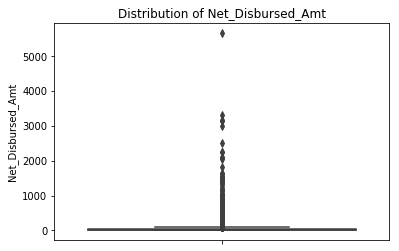

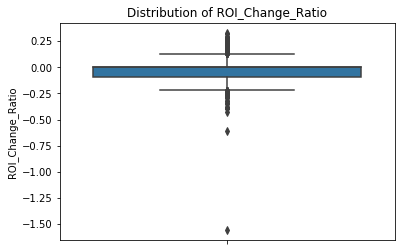

In [376]:
for numeric_variable in TrainX._get_numeric_data():
    plot_box(TrainX, numeric_variable)

In [377]:
TrainX.describe([.25,.5,.75,.80,.85,.90,.95,.97,.98,.99])

,Net_Disbursed_Amt,ROI_Change_Ratio
count,13165.000000,13165.000000
mean,57.395798,-0.030103
std,133.206655,0.066476
min,1.280000,-1.560000
25%,15.310000,-0.090000
50%,26.270000,0.000000
75%,51.040000,0.000000
80%,62.548000,0.000000
85%,78.298000,0.000000
90%,116.428000,0.000000


In [378]:
Train.iloc[:10,1:11]

,Foreclosure,Customer_ID,MOB,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Current_ROI,Original_ROI,Current_Tenure,Original_Tenure
0,NaN,12001002,87,"40,53,498.66","40,53,498.66",06-Sep-10,16.5,12.5,311.0,180
1,NaN,12001003,38,"1,32,57,031.92","1,32,57,031.92",29-Sep-10,15.6,10.9,198.0,180
2,NaN,12001004,46,"1,32,11,403.04","1,32,11,403.04",06-Sep-10,16.5,11.9,142.0,180
3,NaN,12001006,46,"61,55,312.78","61,55,312.78",11-Oct-10,16.5,12.5,262.0,180
4,NaN,12001008,43,"94,99,284.03","94,99,284.03",10-Nov-10,18.9,13.6,52.0,180
5,NaN,12001012,77,"54,00,659.42","54,00,659.42",29-Oct-10,12.8,10.6,285.0,240
6,NaN,12001014,43,"43,08,718.95","43,08,718.95",19-Oct-10,17.5,13.1,304.0,180
7,NaN,12001017,59,"76,88,641.73","76,88,641.73",05-Nov-10,16.5,11.9,59.0,180
8,NaN,12001018,55,"1,72,52,025.09","1,72,52,025.09",03-Nov-10,13.4,10.6,203.0,156
9,NaN,12001022,96,"1,13,75,219.19","1,13,75,219.19",01-Dec-10,13.0,13.7,128.0,120


In [422]:
Train['City'].value_counts()[:10]

MUMBAI       1286
HYDERABAD    1059
AHMEDABAD     965
SURAT         926
PUNE          839
CHENNAI       621
BANGALORE     582
THANE         466
DELHI         431
RAJKOT        384
Name: City, dtype: int64

In [423]:
TrainX['Tenure_Ratio'] = round(Train['Completed_Tenure']/round(Train['Current_Tenure'],0),2)

In [381]:
TrainX.head()

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio
0,40.53,-0.32,0.28
1,132.57,-0.43,0.19
2,132.11,-0.39,0.32
3,61.55,-0.32,0.14
4,94.99,-0.39,0.79


In [382]:
Train.loc[:,['Current_Tenure','Original_Tenure','Completed_Tenure','Balance_Tenure']]

,Current_Tenure,Original_Tenure,Completed_Tenure,Balance_Tenure
0,311.0,180,87,224.0
1,198.0,180,37,161.0
2,142.0,180,46,96.0
3,262.0,180,37,225.0
4,52.0,180,41,11.0
5,285.0,240,77,208.0
6,304.0,180,43,261.0
7,59.0,180,59,0.0
8,203.0,156,55,148.0
9,128.0,120,96,32.0


In [383]:
TrainX['Tenure_Change_Ratio'] = round((Train['Original_Tenure']-Train['Current_Tenure'])
                                      /Train['Original_Tenure'],2)

In [384]:
TrainX['Foreclosure'] = Train['Foreclosure']

In [424]:
TrainX['Net_LTV']=Train['Net_LTV']

In [425]:
TrainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13165 entries, 0 to 13164
Data columns (total 7 columns):
Net_Disbursed_Amt      13165 non-null float64
ROI_Change_Ratio       13165 non-null float64
Tenure_Ratio           13165 non-null float64
Tenure_Change_Ratio    13165 non-null float64
Foreclosure            0 non-null float64
Agreement_ID           13165 non-null int64
Net_LTV                13165 non-null float64
dtypes: float64(6), int64(1)
memory usage: 822.8 KB


In [426]:
TrainX.describe()

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio,Tenure_Change_Ratio,Foreclosure,Agreement_ID,Net_LTV
count,13165.000000,13165.000000,13165.000000,13165.000000,0.0,1.316500e+04,13165.000000
mean,57.395798,-0.030103,0.114411,-0.030319,NaN,1.123651e+07,51.153281
std,133.206655,0.066476,0.142101,0.165569,NaN,9.506713e+03,21.288570
min,1.280000,-1.560000,0.000000,-1.950000,NaN,1.122000e+07,0.610000
25%,15.310000,-0.090000,0.030000,-0.090000,NaN,1.122825e+07,34.910000
50%,26.270000,0.000000,0.060000,0.000000,NaN,1.123655e+07,53.230000
75%,51.040000,0.000000,0.150000,0.000000,NaN,1.124476e+07,66.750000
max,5674.590000,0.330000,1.000000,0.940000,NaN,1.125335e+07,91.310000


In [387]:
TrainX['Agreement_ID'] = Train['Agreement_ID']

In [427]:
pre_std = TrainX[['Net_Disbursed_Amt','ROI_Change_Ratio', 'Tenure_Ratio','Tenure_Change_Ratio','Net_LTV']]

In [428]:
pre_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13165 entries, 0 to 13164
Data columns (total 5 columns):
Net_Disbursed_Amt      13165 non-null float64
ROI_Change_Ratio       13165 non-null float64
Tenure_Ratio           13165 non-null float64
Tenure_Change_Ratio    13165 non-null float64
Net_LTV                13165 non-null float64
dtypes: float64(5)
memory usage: 617.1 KB


In [429]:
std_TrainX = (pre_std - pre_std.mean())/pre_std.std()

In [430]:
std_TrainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13165 entries, 0 to 13164
Data columns (total 5 columns):
Net_Disbursed_Amt      13165 non-null float64
ROI_Change_Ratio       13165 non-null float64
Tenure_Ratio           13165 non-null float64
Tenure_Change_Ratio    13165 non-null float64
Net_LTV                13165 non-null float64
dtypes: float64(5)
memory usage: 617.1 KB


In [431]:
std_TrainX.describe()

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio,Tenure_Change_Ratio,Net_LTV
count,1.316500e+04,1.316500e+04,1.316500e+04,1.316500e+04,1.316500e+04
mean,-2.983549e-14,-1.944263e-14,1.579305e-13,-1.542770e-14,4.531211e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.212687e-01,-2.301436e+01,-8.051395e-01,-1.159444e+01,-2.374198e+00
25%,-3.159437e-01,-9.010307e-01,-5.940217e-01,-3.604596e-01,-7.630048e-01
50%,-2.336655e-01,4.528464e-01,-3.829039e-01,1.831201e-01,9.755091e-02
75%,-4.771382e-02,4.528464e-01,2.504495e-01,1.831201e-01,7.326335e-01
max,4.216902e+01,5.417062e+00,6.232120e+00,5.860507e+00,1.886304e+00


In [432]:
std_TrainX = pd.concat([std_TrainX,TrainX['Agreement_ID']],axis = 1)

In [433]:
import pickle
filename = 'edelweiss_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict_proba(std_TrainX[['Net_Disbursed_Amt','ROI_Change_Ratio', 'Tenure_Ratio','Tenure_Change_Ratio','Net_LTV']])

In [434]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [435]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [436]:
# Let's see the head
y_pred_1.describe()

,1
count,13165.000000
mean,0.461681
std,0.146349
min,0.000038
25%,0.348449
50%,0.477753
75%,0.521927
max,0.989852


In [437]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(std_TrainX['Agreement_ID'])

In [438]:
y_test_df

,Agreement_ID
0,11220003
1,11220004
2,11220005
3,11220007
4,11220009
5,11220013
6,11220015
7,11220018
8,11220019
9,11220023


In [439]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [440]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [441]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Foreclosure_Prob'})

In [442]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Agreement_ID','Foreclosure','Foreclosure_Prob'], axis=1)

In [443]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Foreclosure_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [444]:
y_pred_final = y_pred_final[['Agreement_ID', 'Foreclosure_Prob']]

In [445]:
# Let's see the head of y_pred_final
y_pred_final.head(20)

,Agreement_ID,Foreclosure_Prob
0,11220003,0.086017
1,11220004,0.062022
2,11220005,0.122249
3,11220007,0.077855
4,11220009,0.371909
5,11220013,0.241502
6,11220015,0.058800
7,11220018,0.462677
8,11220019,0.158624
9,11220023,0.846144


In [446]:
y_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13165 entries, 0 to 13164
Data columns (total 2 columns):
Agreement_ID        13165 non-null int64
Foreclosure_Prob    13165 non-null float64
dtypes: float64(1), int64(1)
memory usage: 205.8 KB


In [447]:
y_pred_final = y_pred_final.rename(columns={"Agreement_ID":"AGREEMENTID"})

In [448]:
test = pd.read_csv("test_foreclosure.csv")

In [449]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13342 entries, 0 to 13341
Data columns (total 2 columns):
AGREEMENTID    13342 non-null int64
FORECLOSURE    13165 non-null float64
dtypes: float64(1), int64(1)
memory usage: 208.5 KB


In [450]:
test = pd.merge(test, y_pred_final, how='left', on='AGREEMENTID')

In [451]:
test['FORECLOSURE'] =test['Foreclosure_Prob']

In [452]:
test = test.drop('Foreclosure_Prob',axis = 1)

In [453]:
test.to_csv('out1.csv')

In [ ]:
test['FORECLOSURE'].fillna(0.5)